<a href="https://colab.research.google.com/github/usama-masood/NDVIProfilesOfWinterwheat/blob/master/plotUAVndvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install colour

In [0]:
def setColorMaping(imageArray):
  from colour import Color
  red = Color("red")
  yellow = Color("yellow") 
  green = Color("green")
  grad1len=6
  grad2len=6
  colors = list(red.range_to(yellow,grad1len))
  colors2 = list(yellow.range_to(green,grad2len))
    
  #For colored image    
  imgColor = np.zeros((imageArray.shape[0],imageArray.shape[1],3))
  for x in range(imageArray.shape[0]):
    for y in range(imageArray.shape[1]):
      if (imageArray[x,y]<-0.4):
        imgColor[x,y]=[100,0,0]        #Dark Red
      elif (imageArray[x,y]<-0.2):
        imgColor[x,y]=[255,0,0]        #Red
      elif (imageArray[x,y]<0.2):
        imgColor[x,y]=[255,255,0]       #Yellow
      elif (imageArray[x,y]<0.6):
        imgColor[x,y]=[0,200,0]         #Light Green
      elif (imageArray[x,y]>0.6):
        imgColor[x,y]=[0,100,0]         #Dark Green
      else:        
        imgColor[x,y]=[255,255,255]     #White

  return imgColor

In [0]:
def setColorMaping(imageArray):
  from colour import Color
  red = Color("red")
  yellow = Color("yellow") 
  green = Color("green")
  grad1len=6
  grad2len=6
  colors = list(red.range_to(yellow,grad1len))
  colors2 = list(yellow.range_to(green,grad2len))
    
  #For colored image    
  imgColor = np.zeros((imageArray.shape[0],imageArray.shape[1],3))
  for x in range(imageArray.shape[0]):
    for y in range(imageArray.shape[1]):
      if (imageArray[x,y]<-0.6):
        imgColor[x,y]=[100,0,0]        #Red
      elif (imageArray[x,y]<-0.8):
        imgColor[x,y]=[255,0,0]        #Orange
      elif (imageArray[x,y]<0.06):
        imgColor[x,y]=[255,255,0]       #Yellow
      elif (imageArray[x,y]<0.5):
        imgColor[x,y]=[0,200,0]         #Light Green
      elif (imageArray[x,y]>0.5):
        imgColor[x,y]=[0,100,0]         #Dark Green
      else:        
        imgColor[x,y]=[255,255,255]     #White

  return imgColor

In [0]:
import os
from os.path import isfile, join
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
from os.path import isfile, join
from datetime import datetime
from PIL import Image
import numpy as np
from sklearn import preprocessing

In [0]:
basePath = '/content/drive/My Drive/NUST/3rd Semester/Research Lab/Drone Data/snapshots/2019-10-28_09-31-50/'


In [0]:
import imageio
arr0 = imageio.imread(basePath + 'af7a6693088d-' + 'FW00001.jpg')
arr1 = imageio.imread(basePath + 'af7a6693088d-' + 'FW00005.jpg')
arr2 = imageio.imread(basePath + 'af7a6693088d-' + 'FW00010.jpg')
arr3 = imageio.imread(basePath + 'af7a6693088d-' + 'FW00015.jpg')
arr4 = imageio.imread(basePath + 'af7a6693088d-' + 'FW00020.jpg')


In [0]:
##########################################################################
channelOne=arr0[:,:,0]
channelTwo=arr0[:,:,1]
channelThree=arr0[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVIzero = (NIR-RED)/(NIR+RED)
NDVIzeroScaled = preprocessing.minmax_scale(NDVIzero, feature_range=(-1,1))
#where_are_NaNs = np.isnan(NDVIzeroScaled)
#NDVIzeroScaled[where_are_NaNs] = 5
NDVIzeroColored = setColorMaping(NDVIzeroScaled)

#########################################################################

channelOne=arr1[:,:,0]
channelTwo=arr1[:,:,1]
channelThree=arr1[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVIone = (NIR-RED)/(NIR+RED)
NDVIoneScaled = preprocessing.minmax_scale(NDVIone, feature_range=(-1,1))
NDVIoneColored = setColorMaping(NDVIoneScaled)

In [0]:
#######################################################################
channelOne=arr2[:,:,0]
channelTwo=arr2[:,:,1]
channelThree=arr2[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVItwo = (NIR-RED)/(NIR+RED)
NDVItwoScaled = preprocessing.minmax_scale(NDVItwo, feature_range=(-1,1))
NDVItwoColored = setColorMaping(NDVItwoScaled)


########################################################################
channelOne=arr3[:,:,0]
channelTwo=arr3[:,:,1]
channelThree=arr3[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVIthree = (NIR-RED)/(NIR+RED)
NDVIthreeScaled = preprocessing.minmax_scale(NDVIthree, feature_range=(-1,1))
NDVIthreeColored = setColorMaping(NDVIthreeScaled)

#########################################################################
channelOne=arr4[:,:,0]
channelTwo=arr4[:,:,1]
channelThree=arr4[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVIfour = (NIR-RED)/(NIR+RED)
NDVIfourScaled = preprocessing.minmax_scale(NDVIfour, feature_range=(-1,1))
NDVIfourColored = setColorMaping(NDVIfourScaled)

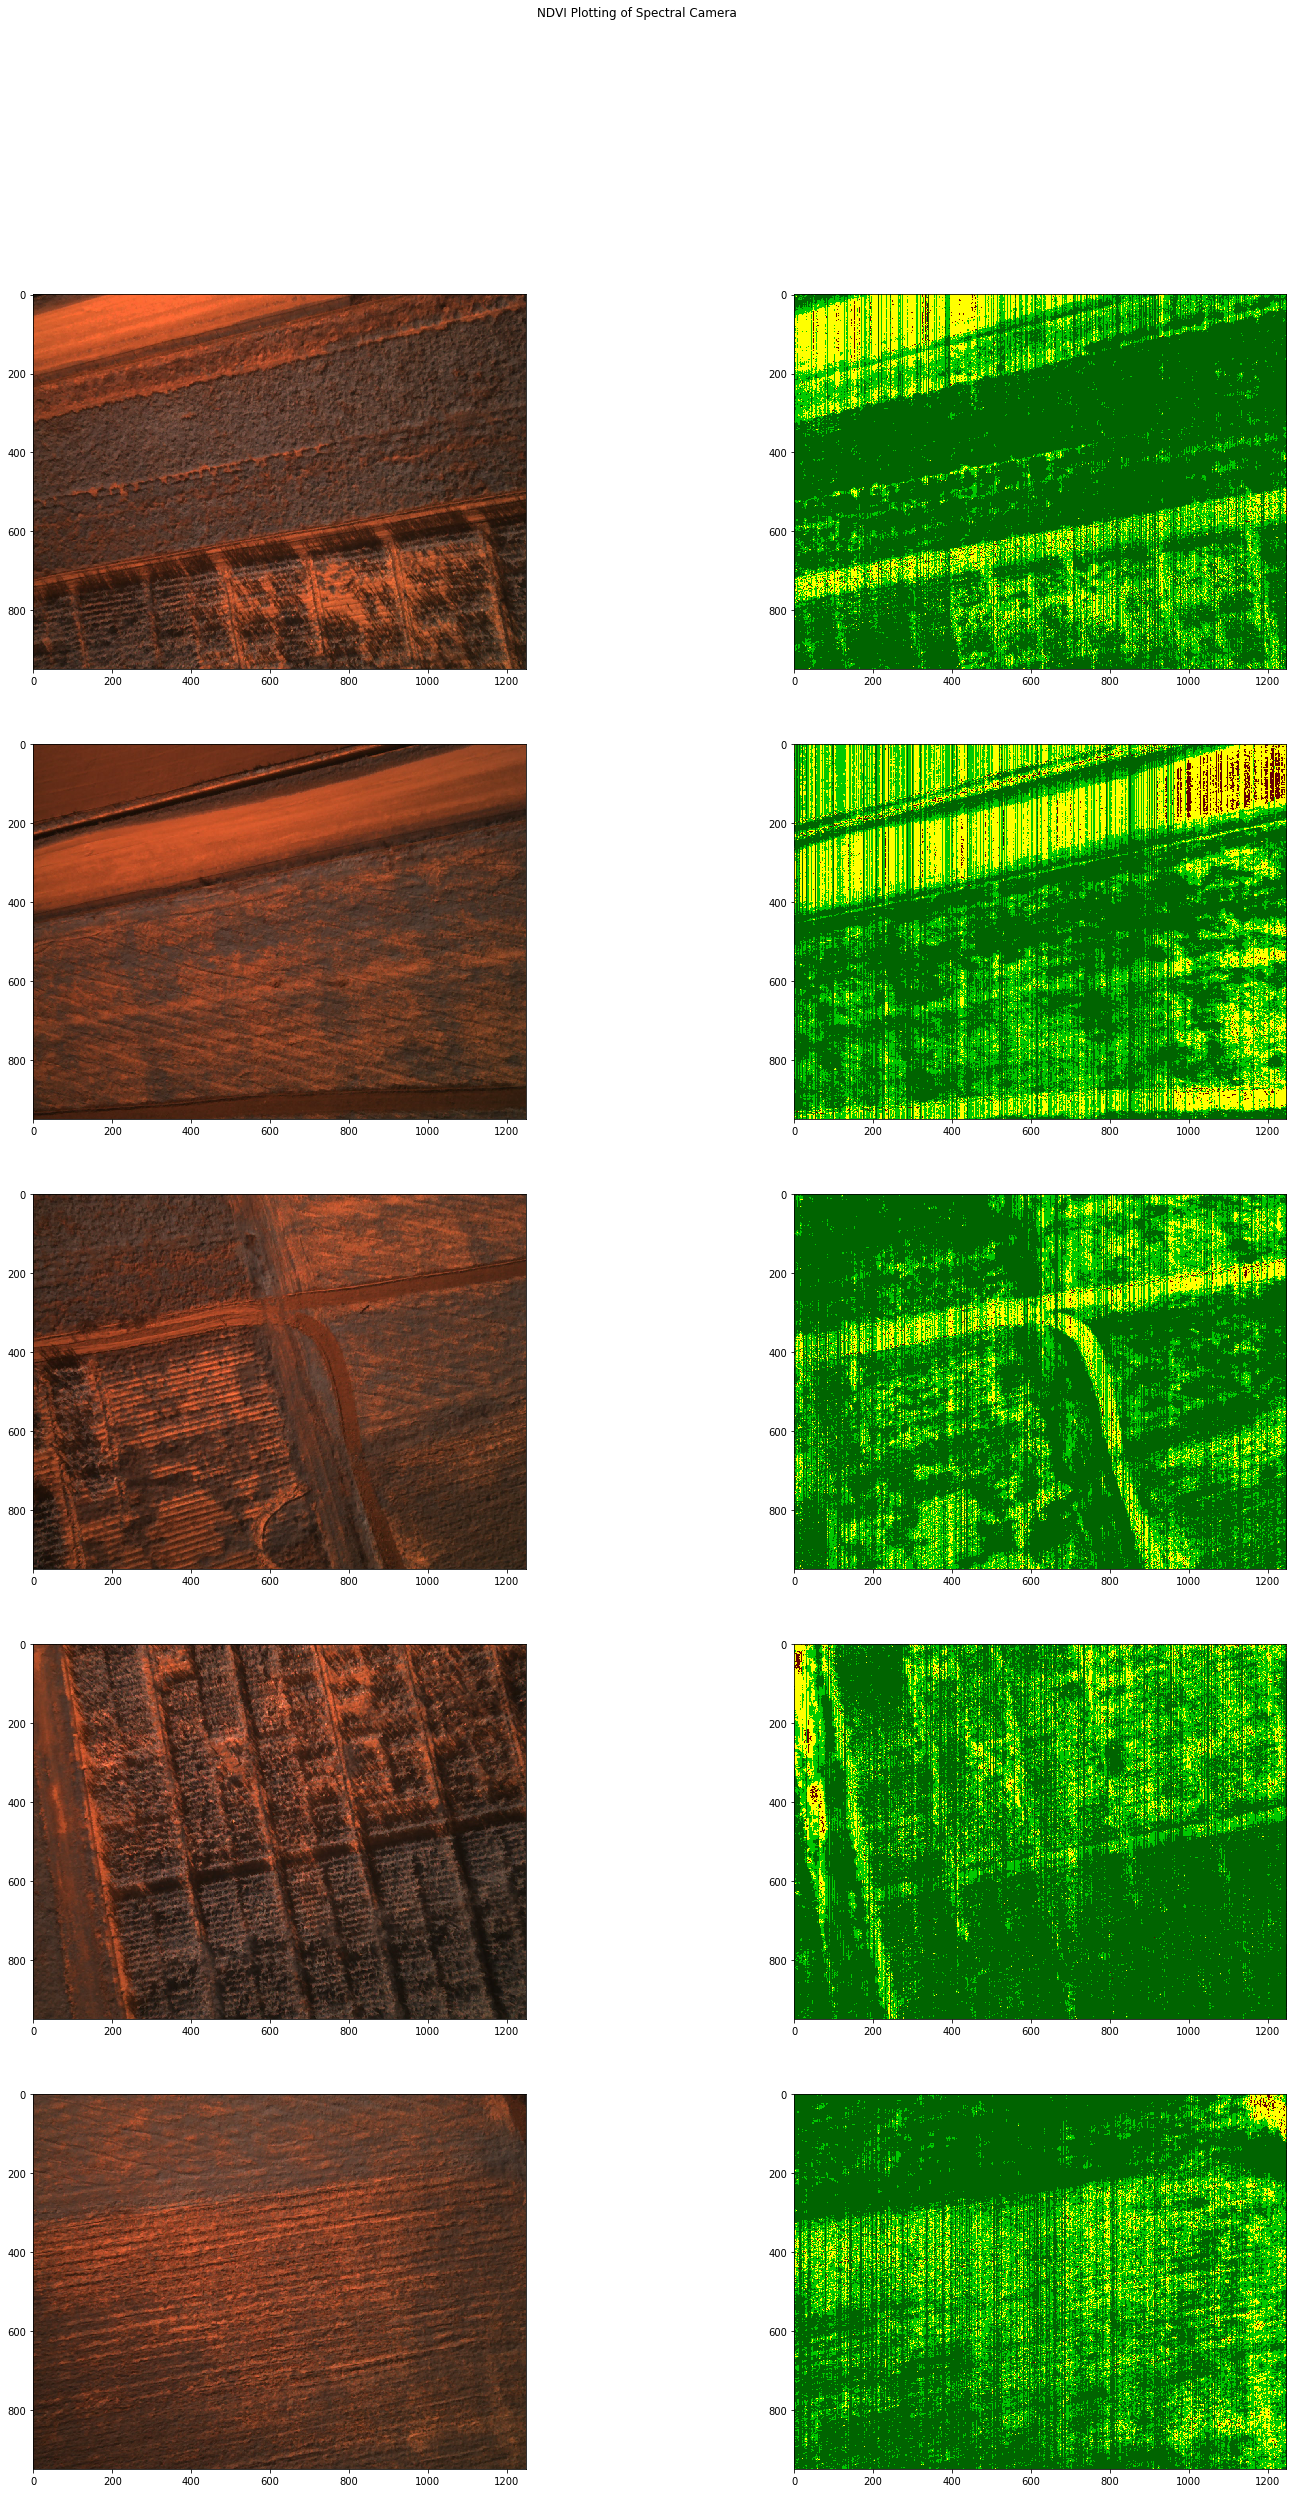

In [0]:
plt.figure(figsize=(25,40))


plt.subplot(5,2,1)
plt.imshow(arr0)

plt.subplot(5,2,2)
plt.imshow(NDVIzeroColored.astype(int))

plt.subplot(5,2,3)
plt.imshow(arr1)

plt.subplot(5,2,4)
plt.imshow(NDVIoneColored.astype(int))

plt.subplot(5,2,5)
plt.imshow(arr2)

plt.subplot(5,2,6)
plt.imshow(NDVItwoColored.astype(int))

plt.subplot(5,2,7)
plt.imshow(arr3)

plt.subplot(5,2,8)
plt.imshow(NDVIthreeColored.astype(int))

plt.subplot(5,2,9)
plt.imshow(arr4)

plt.subplot(5,2,10)
plt.imshow(NDVIfourColored.astype(int))


plt.suptitle('NDVI Plotting of Spectral Camera')
plt.show()

In [0]:
NDVIoneScaled = np.round(NDVIoneScaled,2)
NDVItwoScaled = np.round(NDVItwoScaled,2)
NDVIthreeScaled = np.round(NDVIthreeScaled,2)
NDVIfourScaled = np.round(NDVIfourScaled,2)
NDVIfiveScaled = np.round(NDVIfiveScaled,2)

In [0]:
print('Max Patch One ' + str(NDVIoneScaled.max()))
print('Max Patch Two ' + str(NDVItwoScaled.max()))
print('Max Patch Three ' + str(NDVIthreeScaled.max()))
print('Max Patch Four ' + str(NDVIfourScaled.max()))
print('Max Patch Five ' + str(NDVIfiveScaled.max()))
print('\n')
print('Min Patch One ' + str(NDVIoneScaled.min()))
print('Min Patch Two ' + str(NDVItwoScaled.min()))
print('Min Patch Three ' + str(NDVIthreeScaled.min()))
print('Min Patch Four ' + str(NDVIfourScaled.min()))
print('Min Patch Five ' + str(NDVIfiveScaled.min()))

Max Patch One nan
Max Patch Two nan
Max Patch Three 1.0
Max Patch Four 1.0
Max Patch Five 1.0


Min Patch One nan
Min Patch Two nan
Min Patch Three -1.0
Min Patch Four -1.0
Min Patch Five -1.0


<function matplotlib.pyplot.show>

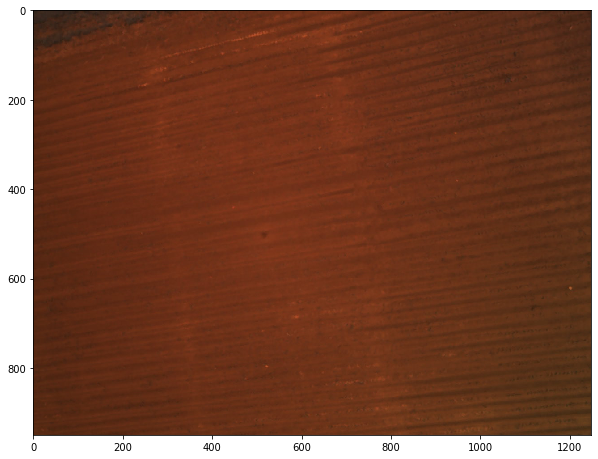

In [0]:
arr1 = imageio.imread('/content/drive/My Drive/NUST/3rd Semester/Research Lab/Drone Data/snapshots/2019-08-08_07-07-11/af7a6693088d-FW00005.jpg')

channelOne=arr1[:,:,0]
channelTwo=arr1[:,:,1]
channelThree=arr1[:,:,2]

RED = channelOne - (1.012*np.array(channelThree))
NIR = 6.403 * (np.array(channelThree))-0.412 * (np.array(channelOne))

#Accounting Light Composition
NIR = 1.5* NIR

NDVIone = (NIR-RED)/(NIR+RED)
NDVIoneScaled = preprocessing.minmax_scale(NDVIone, feature_range=(-1,1))

plt.figure(figsize=(10,10))

plt.subplot(1,1,1)
plt.imshow(arr1)
plt.show

#NDVIzeroColored = setColorMaping(NDVIzeroScaled)

([array([  1.,   5.,  67., 408., 469.]),
  array([  2.,  22., 157., 555., 214.]),
  array([  7.,  63., 164., 459., 257.]),
  array([  4.,  48., 176., 433., 289.]),
  array([  6.,  51., 203., 455., 235.]),
  array([ 25.,  89., 227., 461., 148.]),
  array([  7.,  61., 203., 408., 271.]),
  array([  3.,  11., 120., 372., 444.]),
  array([  6.,  20., 118., 350., 456.]),
  array([  1.,  18., 131., 388., 412.]),
  array([  7.,  66., 161., 467., 249.]),
  array([  3.,  42., 159., 433., 313.]),
  array([  9.,  60., 137., 402., 342.]),
  array([ 18.,  69., 159., 383., 321.]),
  array([  4.,  59., 131., 366., 390.]),
  array([  2.,  48., 122., 367., 411.]),
  array([ 19.,  63., 214., 508., 146.]),
  array([ 24.,  88., 194., 471., 173.]),
  array([ 13.,  70., 206., 404., 257.]),
  array([ 15.,  85., 242., 407., 201.]),
  array([ 11.,  69., 267., 455., 148.]),
  array([  1.,  16., 111., 542., 280.]),
  array([  1.,  11.,  73., 512., 353.]),
  array([  4.,  17.,  83., 502., 344.]),
  array([  1.,  

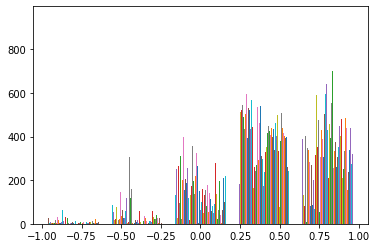

In [0]:
plt.hist(NDVIoneScaled, bins = 5)


([array([ 57., 695., 110.,  54.,  34.]),
  array([186., 645.,  34.,  56.,  29.]),
  array([360., 483.,  22.,  56.,  29.]),
  array([369., 475.,  18.,  59.,  29.]),
  array([352., 493.,  17.,  59.,  29.]),
  array([363., 478.,  21.,  59.,  29.]),
  array([446., 405.,  17.,  53.,  29.]),
  array([245., 595.,  27.,  53.,  30.]),
  array([ 81., 715.,  67.,  51.,  36.]),
  array([148., 677.,  39.,  47.,  39.]),
  array([134., 682.,  49.,  44.,  41.]),
  array([191., 650.,  26.,  41.,  42.]),
  array([144., 691.,  39.,  30.,  46.]),
  array([156., 664.,  50.,  37.,  43.]),
  array([172., 648.,  50.,  36.,  44.]),
  array([ 46., 697., 125.,  37.,  45.]),
  array([273., 557.,  49.,  29.,  42.]),
  array([262., 571.,  45.,  25.,  47.]),
  array([253., 586.,  42.,  20.,  49.]),
  array([109., 718.,  52.,  20.,  51.]),
  array([147., 689.,  38.,  25.,  51.]),
  array([224., 620.,  30.,  28.,  48.]),
  array([207., 634.,  29.,  33.,  47.]),
  array([207., 639.,  25.,  39.,  40.]),
  array([136., 6

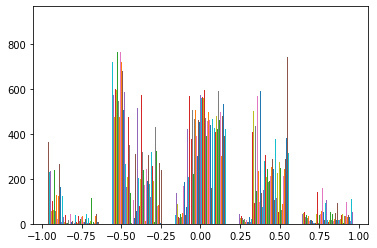

In [0]:
plt.hist(NDVIoneScaled, bins = 5)


In [0]:
import matplotlib.colors

a =np.array([[156, 138, 156],
             [1300, 137, 156],
             [138, 138, 1300],
             [137, 137, 137]])

ca = np.array([[156,200,200,200],
               [138,170,255,245],
               [137,208,130,40],
               [1300,63,165,76]])

u, ind = np.unique(a, return_inverse=True)
b = ind.reshape((a.shape))

colors = ca[ca[:,0].argsort()][:,1:]/255.
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(np.arange(len(ca)+1)-0.5, len(ca))

plt.imshow(b, cmap=cmap, norm=norm)

cb = plt.colorbar(ticks=np.arange(len(ca)))
cb.ax.set_yticklabels(np.unique(ca[:,0]))

plt.show()

In [0]:
!pip install colour
!pip install scipy

In [0]:
import sys
import numpy as np
import scipy.misc
import imageio

from PIL import Image

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.array( img)
    return data


imgdata = load_image(basePath + 'af7a6693088d-FW00001.jpg')

#Extracting ndvi
ndvi1 = 1.236*imgdata[:,:, 2] - 0.188*imgdata[:,:, 0]
ndvi2 = 1.000*imgdata[:,:, 2] + 0.044*imgdata[:,:, 0]
ndvi = ndvi1/ndvi2


#removing negative values
ndviF=ndvi
for x in range(ndviF.shape[0]):
  for y in range(ndviF.shape[1]):
    if (ndviF[x,y]<0):
      ndviF[x,y] = 0
   

def setColorMaping(imageArray):
  from colour import Color
  red = Color("red")
  yellow = Color("yellow") 
  green = Color("green")
  grad1len=6
  grad2len=6
  colors = list(red.range_to(yellow,grad1len))
  colors2 = list(yellow.range_to(green,grad2len))
    
  #For colored image    
  imgColor = np.zeros((imageArray.shape[0],imageArray.shape[1],3))
  for x in range(imageArray.shape[0]):
    for y in range(imageArray.shape[1]):
      if (ndvi[x,y]<0.3):
        imgColor[x,y]=[255,0,0]
      elif (imageArray[x,y]<0.4):
        imgColor[x,y]=[255,165,0]
      elif (imageArray[x,y]<0.47):
        imgColor[x,y]=[255,255,0]
      elif (imageArray[x,y]<0.55):
        imgColor[x,y]=[0,128,0]
      else:
        imgColor[x,y]=[0,100,0]

return imgColor

In [0]:
from IPython.display import Image
Image(filename='/content/NDVI.jpg') 